<a href="https://colab.research.google.com/github/VandersonGJesus/lia1_2024_1/blob/main/Aula_08_Modelo_TensorFlow_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 08 - Construindo Modelo com TensorFlow - Fashion MNIST**

Problema: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: airplane; automobile; bird; cat; deer; dog; frog; horse; ship; truck.

Não há mágica. Há matemática! 🧙

In [1]:
# Importando o necessário
import tensorflow as tf #"motor"
from tensorflow.keras import datasets, layers, models #dataset
import matplotlib.pyplot as plt #graficos
import numpy as np #matematica
from PIL import Image

### **Carregamento dos Dados Treino e Teste**

In [2]:
# Carrega o dataset Fashion MNIST - Já está no Keras!
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Classes das imagens
nomes_classes = ['Camiseta', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Tênis', 'Bolsa', 'Bota']

### **Pré-processsamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [5]:
# Função para exibir as imagens
def visualiza_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(15):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

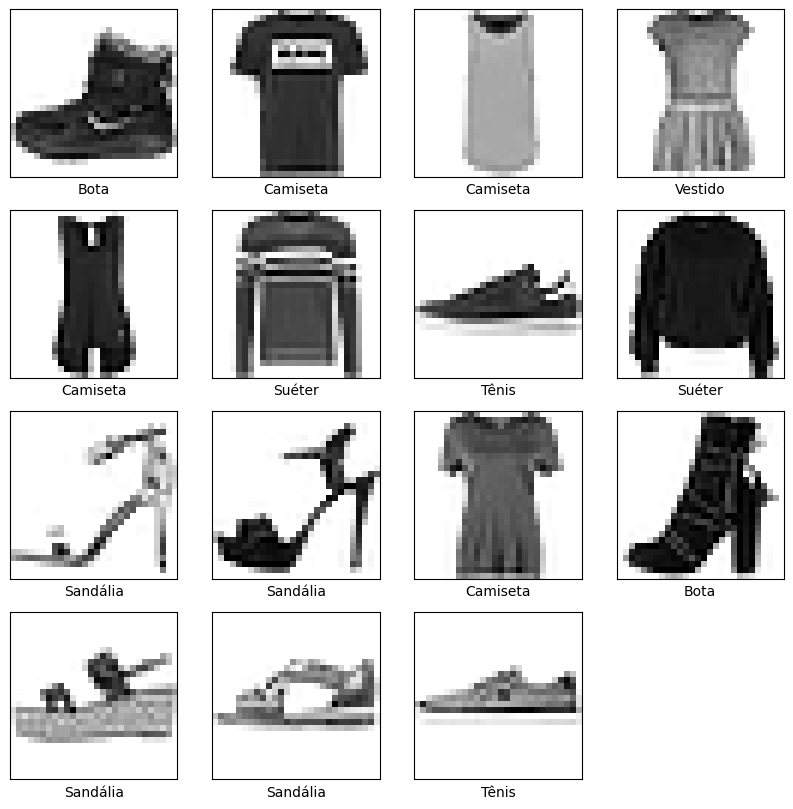

In [6]:
# Executa a função
visualiza_imagens(imagens_treino, labels_treino)

### **Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [7]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [9]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

### **Treinamento**

In [10]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.5899 - accuracy: 0.7853 - val_loss: 0.4865 - val_accuracy: 0.8220
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4046 - accuracy: 0.8530 - val_loss: 0.3823 - val_accuracy: 0.8598
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3482 - accuracy: 0.8720 - val_loss: 0.3632 - val_accuracy: 0.8686
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3152 - accuracy: 0.8830 - val_loss: 0.3369 - val_accuracy: 0.8745
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2863 - accuracy: 0.8934 - val_loss: 0.3266 - val_accuracy: 0.8796
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2655 - accuracy: 0.9006 - val_loss: 0.3493 - val_accuracy: 0.8738
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2467 - accuracy: 0.9077 - val_loss: 0.3128 - val_accuracy

### **Previsão - Testar o modelo (Deploy)**

In [11]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/images/t-shirt top.jpg")

In [12]:
# 28x28 pixels e cor cinza
nova_imagem = nova_imagem.convert('L')
nova_imagem = nova_imagem.resize((28, 28))

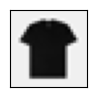

In [13]:
# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')  # Specify cmap='gray' to display grayscale image
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [15]:
# Expande a dimensão do array para que ele tenha o formato (1, 28, 28, 1)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [16]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 261ms/step


In [17]:
print(previsoes)

[[9.16603580e-02 3.08644696e-04 6.31840944e-01 1.69241540e-02
  9.27911606e-03 1.10108385e-05 2.37807944e-01 3.70045280e-04
  1.12054488e-02 5.92376571e-04]]


In [18]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [19]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Suéter
